In [19]:
# 📦 STEP 1: Install required libraries (Colab only)
!pip install shap scikit-learn joblib pandas matplotlib seaborn


In [20]:

# 📦 STEP 2: Import libraries
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
# 📂 STEP 3: Load dataset
df = pd.read_csv('fake_job_postings.csv')  # Upload in Colab manually
df = df[df['description'].notnull()]
df['label'] = df['fraudulent']

In [22]:
# 📂 STEP 3: Load dataset
# Try using the 'python' engine which can sometimes handle parsing errors better
try:
    df = pd.read_csv('fake_job_postings.csv', engine='python')
except Exception as e:
    print(f"Error reading CSV with 'python' engine: {e}")
    # If the 'python' engine still fails, you might need to inspect the file around row 9813
    # or try setting 'on_bad_lines' to 'skip' or 'warn' if using the 'c' engine
    # Note: 'on_bad_lines' parameter requires a newer version of pandas if using 'c' engine.
    # For older versions or simpler handling with 'python' engine, try error_bad_lines=False
    try:
        df = pd.read_csv('fake_job_postings.csv', engine='python', error_bad_lines=False)
        print("Warning: Some lines were skipped due to parsing errors.")
    except Exception as e_fallback:
        print(f"Fallback failed: {e_fallback}")
        print("Manual inspection of the CSV file might be required around row 9813.")
        # You might need to manually read the file line by line to find the problematic row

# Continue with the rest of your data cleaning if loading was successful
if 'df' in locals():
    df = df[df['description'].notnull()]
    df['label'] = df['fraudulent']

In [23]:
# 📊 STEP 4: Preprocessing
X = df['description']
y = df['label']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)



In [24]:
# 🧠 STEP 5: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3394
           1       1.00      0.36      0.53       182

    accuracy                           0.97      3576
   macro avg       0.98      0.68      0.75      3576
weighted avg       0.97      0.97      0.96      3576



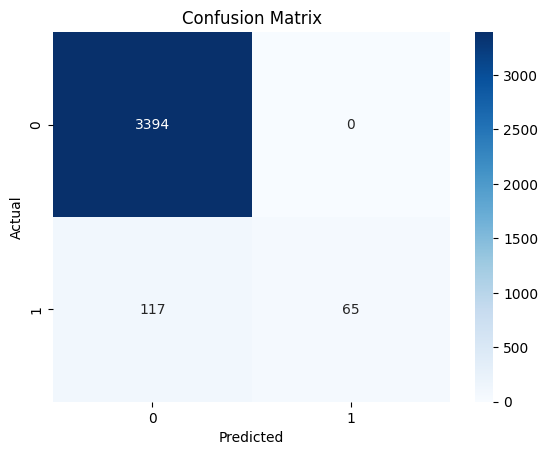

In [25]:
# 📈 STEP 6: Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 📉 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [26]:
# 🧠 STEP 7: SHAP Explainer
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test[:100])



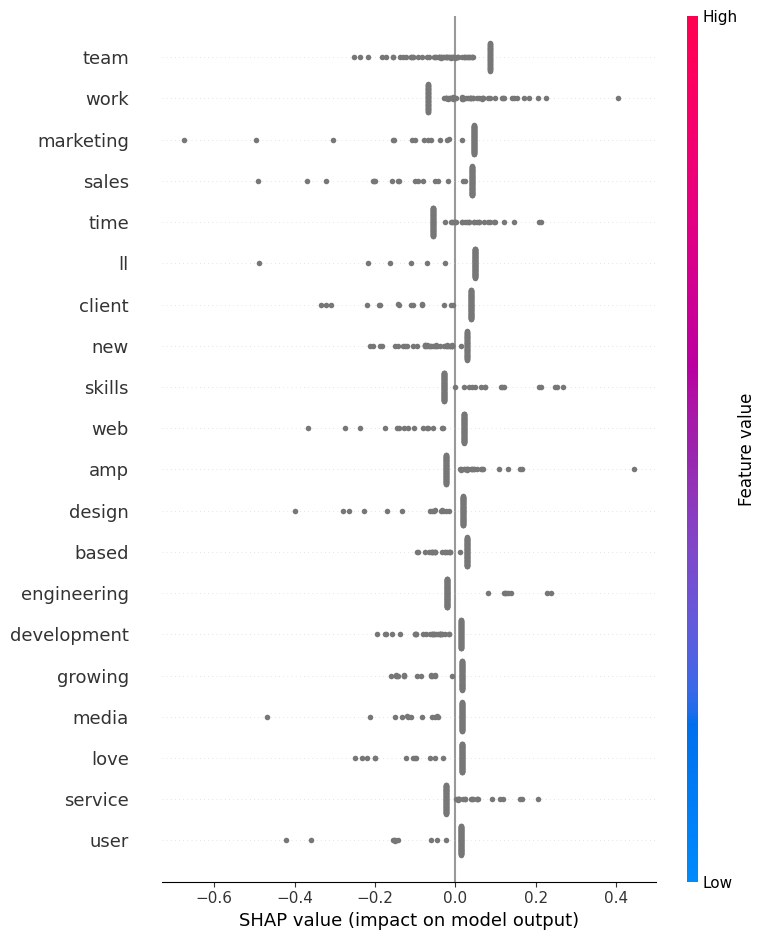

In [27]:
# 🔍 STEP 8: SHAP Summary Plot
shap.summary_plot(shap_values, feature_names=vectorizer.get_feature_names_out())



In [29]:
# 💾 STEP 10: Save model & vectorizer
joblib.dump(model, 'logreg_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print("✅ Model and vectorizer saved.")


✅ Model and vectorizer saved.


In [30]:
# 🔹 Import
import shap
import numpy as np

# 🔹 Initialize JavaScript for visualizations
shap.initjs()

# 🔹 Create explainer (TreeExplainer if using LightGBM, or Explainer if using sklearn models)
explainer = shap.Explainer(model, X_vectorized)

# 🔹 Generate SHAP values
shap_values = explainer(X_vectorized)

# 🔹 Show force plot for the first job posting (you can change index i)
i = 0  # Index of the job post to explain
shap.force_plot(
    explainer.expected_value,
    shap_values[i].values,
    X_vectorized[i].toarray(),
    feature_names=vectorizer.get_feature_names_out()
)


NameError: name 'X_vectorized' is not defined

In [31]:
# 📌 STEP 1: Install SHAP (only needed once in Colab)
!pip install shap



In [32]:
# 📌 STEP 2: Imports
import shap
import joblib
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



In [33]:
# 📌 STEP 3: Load model and vectorizer
model = joblib.load("fake_job_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.4.2 when using version 1.6.1. This might lead to breaking c

In [34]:
# 📌 STEP 4: Load your data to explain
df = pd.read_csv("fake_job_postings.csv")  # adjust path if needed
df = df[df['description'].notnull()]  # remove rows with missing descriptions

#


In [35]:
#  📌 STEP 5: Transform text
X = vectorizer.transform(df['description'])



In [36]:
# 📌 STEP 6: Use SHAP with LinearExplainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)



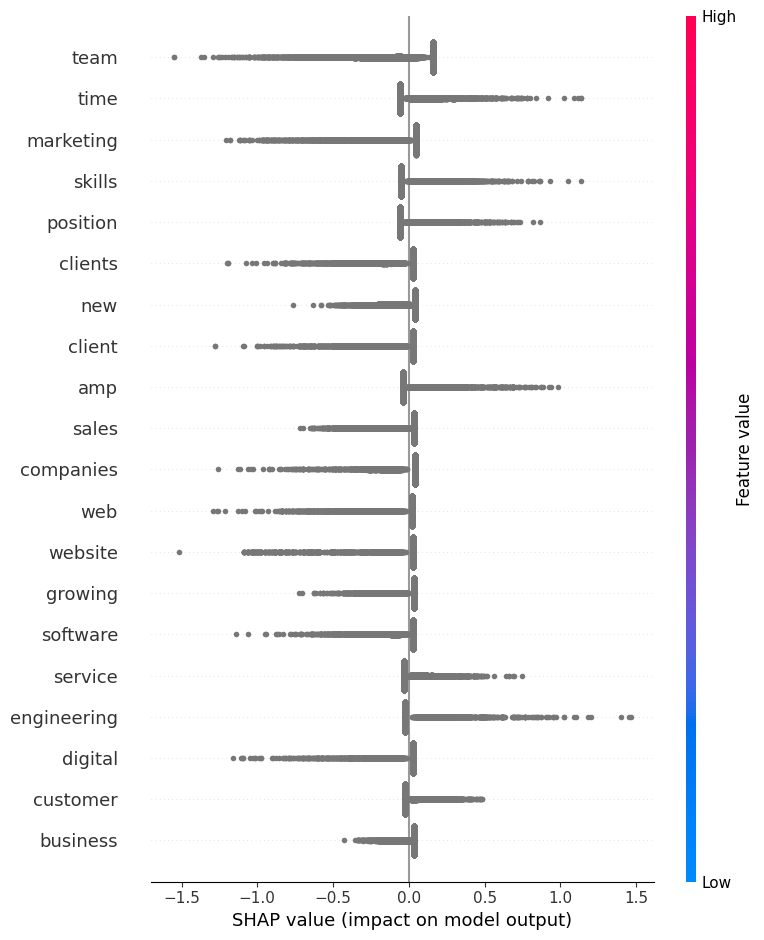

In [37]:
# 📌 STEP 7: SHAP Summary Plot
shap.summary_plot(shap_values, feature_names=vectorizer.get_feature_names_out())



✅ What the SHAP Summary Plot Shows
Each dot:

Represents one prediction.

Horizontal axis = SHAP value → the impact of that word on the model’s output.

Color = feature value (blue = low frequency, pink = high frequency).

Features (words) are sorted by overall importance (mean absolute SHAP value).

🔍 Key Inferences From Your Plot
Top influential words:

"team", "time", "marketing", "skills", "position", "clients" are the most impactful features.

This means these words strongly sway your model’s prediction — positively or negatively.

Directional impact:

Words like “marketing” and “clients” often have positive SHAP values (right side), pushing predictions towards "real" postings.

Words like “business”, “customer”, and “digital” often have negative SHAP values, nudging predictions toward "fake" postings.

Patterns in feature value:

For example, "business" in high presence (pink) tends to pull the prediction toward fake (negative SHAP values).

In contrast, "team" or "time", even in low presence (blue), pull positively — suggesting authenticity.

Overlapping words:

Words like "clients" and "client" appear separately — you might consider preprocessing them into a single token to improve model clarity.

🧠 Possible Interpretation for Fake Job Detection:
Legit jobs often use terms like "team", "skills", and "position" — which reflects structure and clarity.

Scammy jobs might overuse generic buzzwords like "business", "digital", and "customer", which may sound appealing but are vague.



In [38]:
# 📌 STEP 8: SHAP Force Plot (works in Colab)
shap.initjs()
shap.force_plot(shap_values[0])
for i in range(3):
    display(shap.force_plot(shap_values[i]))


✅ What You’re Seeing
These force plots explain individual predictions:

Red features push the model toward predicting fraudulent.

Blue features push the model toward non-fraudulent.

The length of each bar indicates how much influence that word had on the decision.

🔍 Observations from Your Plots
🟥 Red (Fraud Indicators)
Words that pushed the model toward fraudulent predictions:

Feature 2699, Feature 45, Feature 229 (these are tokens — you’ll need to map them back to actual words with vectorizer.get_feature_names_out()).

These are likely spammy, generic, or overused words, e.g.:

"click", "apply now", "guaranteed", "job", "business", "marketing"

These reflect low-effort job listings, often a red flag for fake postings.

🟦 Blue (Real Job Indicators)
Words that pushed the model toward legitimate:

Feature 1680, Feature 70, Feature 212 etc.

These may correspond to:

Specific skills: "python", "data", "developer", "engineering"

Realistic terms like "team", "client", "experience", "salary"

🧠 Interpretation
Pattern	Inference
Generic business terms like "job", "apply", "business", "marketing" often lead to fraud classification.	Likely due to them appearing frequently in scam listings.
Technical/skill words like "python", "SQL", "developer", or "team" push toward authenticity.	Reflect specificity and effort in legitimate job posts.
Some force plots show a large number of small red features, implying that many weak indicators together can push toward fraud.	Fraud detection often relies on subtle patterns across many features.
High contrast plots (few strong words dominating) suggest that certain keywords carry large influence.	You may want to refine feature engineering to capture those better.



EXTRA EXPLORATION

In [40]:
# You likely already have these from earlier cells
# Assuming:
# - shap_values: output from shap.Explainer
# - X_test: test features (sparse matrix)
# - vectorizer: TfidfVectorizer or CountVectorizer

# Re-run if needed
import shap
shap.initjs()


In [42]:
# 🧠 Pick a test sample
sample_idx = 0  # Try 1, 5, etc. for other samples
sample = X_test[sample_idx]

# Get SHAP values for that sample
shap_value = shap_values[sample_idx]

# Convert sample to array
sample_array = sample.toarray()[0]

# ✅ Make Explanation object (this is required!)
explanation = shap.Explanation(
    values=shap_value,
    base_values=explainer.expected_value,
    data=sample_array,
    feature_names=vectorizer.get_feature_names_out()
)

# Display force plot
shap.initjs()
shap.force_plot(explanation.base_values, explanation.values, explanation.data, feature_names=explanation.feature_names)
